In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
df = pd.read_csv("raw_data/train.csv")

In [4]:
df.head(2)

,time,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,...,t_50m:C,relative_humidity_50m:p,dew_point_50m:C,wind_speed_50m:ms,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d
0,2020-01-01 13:00:00,0.0,40.59,26.514689,0.28969,0.0,0.0,1.0,10.0,64826.0,...,8.4,60.7,1.3,8.4,246.3,8.3,60.3,1.0,10.4,247.3
1,2020-01-01 14:00:00,0.0,67.86,28.326960,0.29561,0.0,0.0,1.0,0.0,8961.1,...,8.4,61.6,1.5,8.0,252.3,8.4,60.7,1.2,10.0,252.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      9515 non-null   object 
 1   pv_production             9515 non-null   float64
 2   wind_production           9515 non-null   float64
 3   consumption               9515 non-null   float64
 4   spot_market_price         9515 non-null   float64
 5   precip_1h:mm              9515 non-null   float64
 6   precip_type:idx           9515 non-null   float64
 7   prob_precip_1h:p          9515 non-null   float64
 8   clear_sky_rad:W           9515 non-null   float64
 9   clear_sky_energy_1h:J     9515 non-null   float64
 10  diffuse_rad:W             9515 non-null   float64
 11  diffuse_rad_1h:Wh         9515 non-null   float64
 12  direct_rad:W              9515 non-null   float64
 13  direct_rad_1h:Wh          9515 non-null   float64
 14  global_r

In [6]:
df["precip_type:idx"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9510    0.0
9511    0.0
9512    0.0
9513    0.0
9514    0.0
Name: precip_type:idx, Length: 9515, dtype: float64

In [11]:
df["precip_type:idx"].unique()

array([0., 1., 2., 3.])

In [13]:
df["precip_type:idx"].isnull().sum()

np.int64(0)

In [16]:
df = df.astype({'precip_type:idx': 'int32'})

integer indicating the precipitation type (0 - none, 1 - rain, 2 - rain and snow mix, 3 - snow, 4 - sleet, 5 - freezing rain, 6 - hail)

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(df[['precip_type:idx']]) 

# Display the detected categories
ohe.categories_

[array([0, 1, 2, 3], dtype=int32)]

In [19]:
# Display the generated column names for the encoded values
ohe.get_feature_names_out()

array(['precip_type:idx_0', 'precip_type:idx_1', 'precip_type:idx_2',
       'precip_type:idx_3'], dtype=object)

In [20]:
# Transform the current "precip_type" column
df[ohe.get_feature_names_out()] = ohe.transform(df[['precip_type:idx']])

In [21]:
# Drop the column "Street" which has been encoded
df_precip = df.drop(columns = ['precip_type:idx'])

In [22]:
df_precip

,time,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,diffuse_rad:W,...,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d,precip_type:idx_0,precip_type:idx_1,precip_type:idx_2,precip_type:idx_3
0,2020-01-01 13:00:00,0.0,40.59,26.514689,0.28969,0.0,1.0,10.0,64826.0,7.4,...,246.3,8.3,60.3,1.0,10.4,247.3,1.0,0.0,0.0,0.0
1,2020-01-01 14:00:00,0.0,67.86,28.326960,0.29561,0.0,1.0,0.0,8961.1,0.0,...,252.3,8.4,60.7,1.2,10.0,252.1,1.0,0.0,0.0,0.0
2,2020-01-01 15:00:00,0.0,116.68,23.682207,0.30044,0.0,1.0,0.0,0.0,0.0,...,254.1,8.4,59.6,1.0,11.7,253.8,1.0,0.0,0.0,0.0
3,2020-01-01 16:00:00,0.0,120.22,25.354782,0.29975,0.0,1.0,0.0,0.0,0.0,...,254.6,8.3,63.4,1.7,14.3,254.2,1.0,0.0,0.0,0.0
4,2020-01-01 17:00:00,0.0,109.86,23.861942,0.29650,0.0,1.0,0.0,0.0,0.0,...,249.5,7.1,77.9,3.5,13.9,249.7,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,2021-01-31 19:00:00,0.0,21.98,44.422658,0.60243,0.0,1.0,0.0,0.0,0.0,...,231.2,-3.1,91.6,-4.3,6.0,238.3,1.0,0.0,0.0,0.0
9511,2021-01-31 20:00:00,0.0,9.60,45.167707,0.53335,0.0,1.0,0.0,0.0,0.0,...,224.9,-3.3,92.1,-4.4,6.2,231.8,1.0,0.0,0.0,0.0
9512,2021-01-31 21:00:00,0.0,22.61,32.476198,0.51195,0.0,1.0,0.0,0.0,0.0,...,224.5,-3.3,90.6,-4.6,6.0,231.7,1.0,0.0,0.0,0.0
9513,2021-01-31 22:00:00,0.0,21.70,28.561791,0.47122,0.0,1.0,0.0,0.0,0.0,...,222.8,-3.4,89.5,-4.9,5.8,231.1,1.0,0.0,0.0,0.0


# pipeline

In [23]:
from sklearn.pipeline import make_pipeline

In [24]:
import seaborn as sns

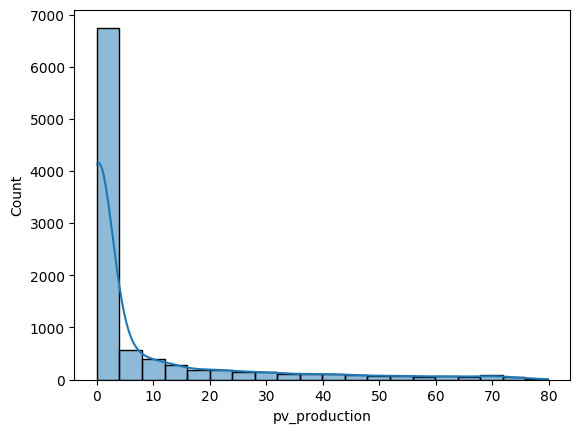

In [26]:
sns.histplot(df['pv_production'], bins=20,kde = True);

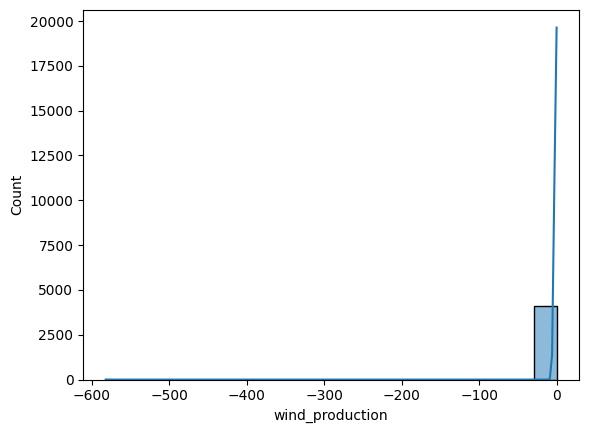

In [40]:
sns.histplot(b["wind_production"], bins=20,kde = True);

In [30]:
min(df['wind_production'])

-582.2

In [31]:
df['wind_production'].mean()

np.float64(21.254381502890173)

In [37]:
b = df[df['wind_production']<0]

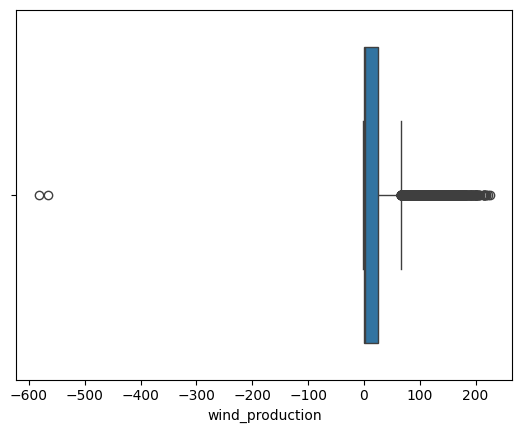

In [41]:
sns.boxplot(data=df, x='wind_production');

In [49]:
b[b["wind_production"]<-300]

,time,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,...,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d,precip_type:idx_0,precip_type:idx_1,precip_type:idx_2,precip_type:idx_3
6639,2020-10-04 04:00:00,0.000000,-566.34,15.745034,0.01744,0.0,0,1.0,0.0,0.0,...,96.5,10.2,81.1,7.1,6.8,103.4,1.0,0.0,0.0,0.0
8396,2020-12-16 09:00:00,0.215417,-582.20,22.556104,0.25796,0.0,0,1.0,0.0,0.0,...,222.9,4.7,93.2,3.7,4.9,236.9,1.0,0.0,0.0,0.0


## wind_dir

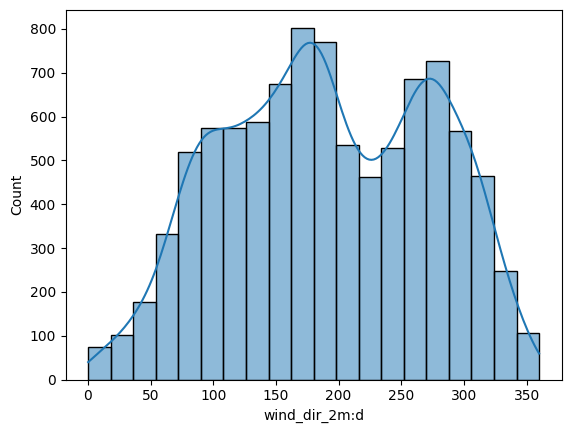

In [50]:
sns.histplot(df["wind_dir_2m:d"], bins=20,kde = True);

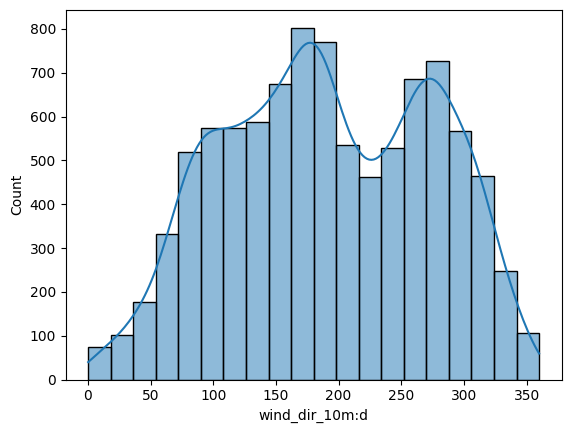

In [51]:
sns.histplot(df["wind_dir_10m:d"], bins=20,kde = True);

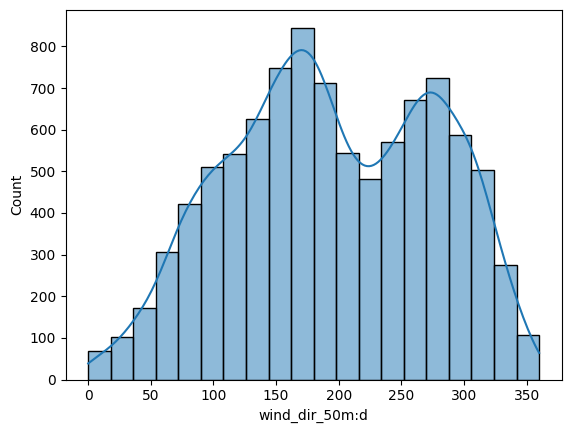

In [53]:
sns.histplot(df["wind_dir_50m:d"], bins=20,kde = True);

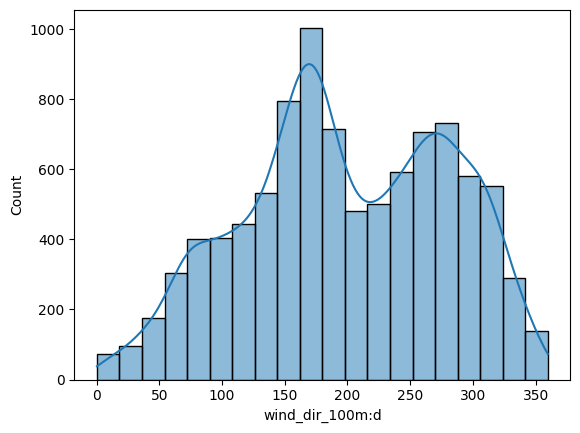

In [54]:
sns.histplot(df["wind_dir_100m:d"], bins=20,kde = True);

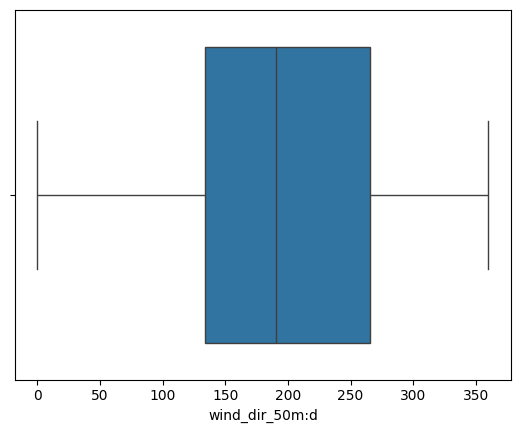

In [62]:
sns.boxplot(data=df, x='wind_dir_50m:d');

In [65]:
round(df[["wind_dir_2m:d","wind_dir_10m:d", "wind_dir_50m:d","wind_dir_100m:d"]].describe(),2)

,wind_dir_2m:d,wind_dir_10m:d,wind_dir_50m:d,wind_dir_100m:d
count,9515.00,9515.00,9515.00,9515.00
mean,191.81,191.81,195.02,198.63
std,81.94,81.94,81.36,81.09
min,0.20,0.20,0.10,0.30
25%,126.80,126.80,134.10,142.95
50%,187.90,187.90,190.40,192.30
75%,263.20,263.20,265.50,267.70
max,360.00,360.00,359.90,359.70


In [70]:
round(df[[
    'wind_speed_100m:ms',
     'wind_speed_10m:ms',
     'wind_speed_2m:ms',
     'wind_speed_50m:ms'
]].describe(),2)

,wind_speed_100m:ms,wind_speed_10m:ms,wind_speed_2m:ms,wind_speed_50m:ms
count,9515.00,9515.00,9515.00,9515.00
mean,5.12,3.06,2.13,4.28
std,2.67,1.64,1.14,2.24
min,0.10,0.10,0.00,0.10
25%,3.00,1.80,1.30,2.50
50%,4.90,2.80,1.90,4.00
75%,6.70,4.00,2.80,5.60
max,17.40,11.40,8.00,15.30


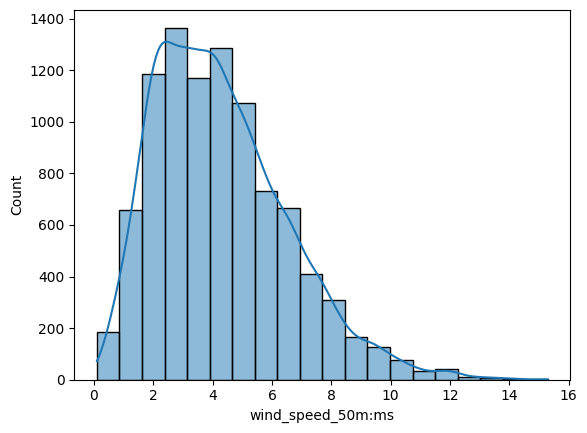

In [79]:
sns.histplot(df["wind_speed_50m:ms"], bins=20,kde = True);

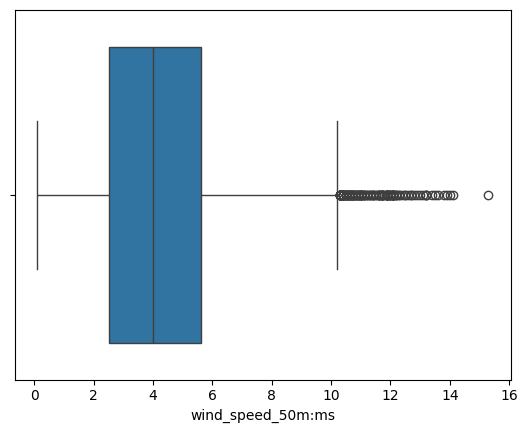

In [74]:
sns.boxplot(data=df, x='wind_speed_50m:ms');

In [47]:
eps = 1e-5
df['log_wind_speed_2m:ms'] = np.log(df['wind_speed_2m:ms'] + eps)
df['log_wind_speed_10m:ms'] = np.log(df['wind_speed_10m:ms'] + eps)
df['log_wind_speed_50m:ms'] = np.log(df['wind_speed_50m:ms'] + eps)
df['log_wind_speed_100m:ms'] = np.log(df['wind_speed_100m:ms'] + eps)

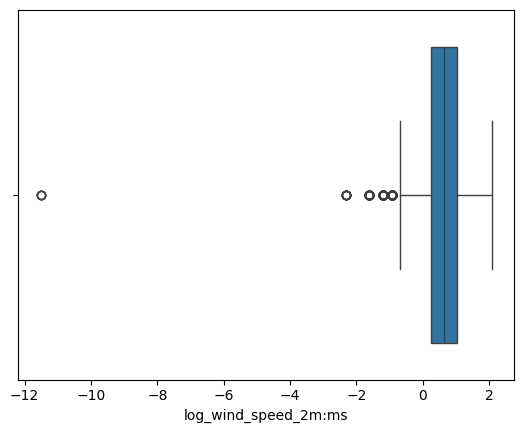

In [51]:
sns.boxplot(data=df, x='log_wind_speed_2m:ms');

In [116]:
round(df[[
    "precip_1h:mm"
]].describe(),2)

,precip_1h:mm
count,9515.00
mean,0.07
std,0.35
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,6.22


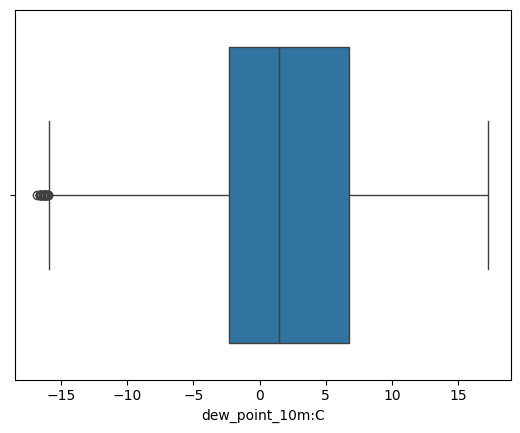

In [113]:
sns.boxplot(data=df, x='dew_point_10m:C');

In [115]:
df[df['dew_point_10m:C']<-15].count()

time                        41
pv_production               41
wind_production             41
consumption                 41
spot_market_price           41
precip_1h:mm                41
precip_type:idx             41
prob_precip_1h:p            41
clear_sky_rad:W             41
clear_sky_energy_1h:J       41
diffuse_rad:W               41
diffuse_rad_1h:Wh           41
direct_rad:W                41
direct_rad_1h:Wh            41
global_rad:W                41
global_rad_1h:Wh            41
sunshine_duration_1h:min    41
sun_azimuth:d               41
sun_elevation:d             41
low_cloud_cover:p           41
medium_cloud_cover:p        41
high_cloud_cover:p          41
total_cloud_cover:p         41
effective_cloud_cover:p     41
temp                        41
relative_humidity_2m:p      41
dew_point_2m:C              41
wind_speed_2m:ms            41
wind_dir_2m:d               41
t_10m:C                     41
relative_humidity_10m:p     41
dew_point_10m:C             41
wind_spe

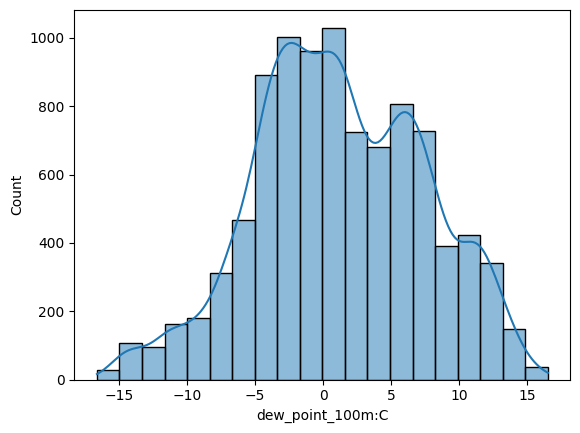

In [101]:
sns.histplot(df["dew_point_100m:C"], bins=20,kde = True);

In [80]:
round(df[[
    'dew_point_100m:C',
     'dew_point_10m:C',
     'dew_point_2m:C',
     'dew_point_50m:C'
]].describe(),2)

,dew_point_100m:C,dew_point_10m:C,dew_point_2m:C,dew_point_50m:C
count,9515.00,9515.00,9515.00,9515.00
mean,1.22,1.92,1.99,1.59
std,6.26,6.32,6.34,6.27
min,-16.60,-16.80,-17.30,-16.30
25%,-3.10,-2.30,-2.20,-2.70
50%,0.90,1.50,1.50,1.20
75%,6.00,6.80,6.90,6.40
max,16.50,17.30,17.40,17.00


In [117]:
eps = 1e-5
df['log_dew_point_2m:C'] = np.log(df['dew_point_2m:C'] + eps)
df['log_dew_point_10m:C'] = np.log(df['dew_point_10m:C'] + eps)
df['log_dew_point_50m:C'] = np.log(df['dew_point_50m:C'] + eps)
df['log_dew_point_100m:C'] = np.log(df['dew_point_100m:C'] + eps)

/home/emilymco/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/emilymco/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/emilymco/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/emilymco/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [118]:
round(df[[
    'relative_humidity_100m:p',
    'relative_humidity_10m:p',
    'relative_humidity_2m:p',
    'relative_humidity_50m:p'
]].describe(),2)

,relative_humidity_100m:p,relative_humidity_10m:p,relative_humidity_2m:p,relative_humidity_50m:p
count,9515.00,9515.00,9515.00,9515.00
mean,74.84,78.38,78.97,76.28
std,14.00,13.71,13.74,13.79
min,22.30,25.40,26.00,23.40
25%,65.90,69.70,70.30,67.40
50%,76.80,80.70,81.10,78.40
75%,85.70,89.10,89.80,87.10
max,100.00,100.00,100.00,100.00


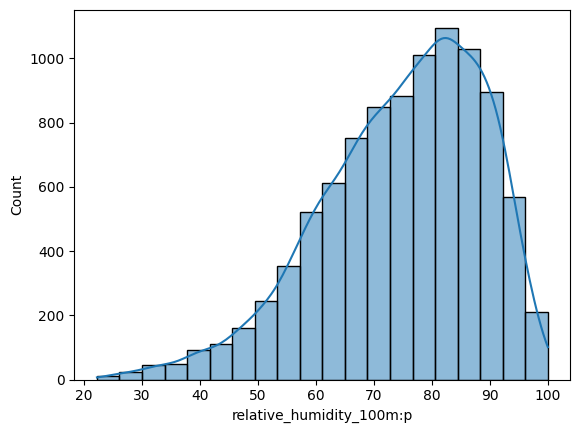

In [9]:
sns.histplot(df["relative_humidity_100m:p"], bins=20,kde = True);

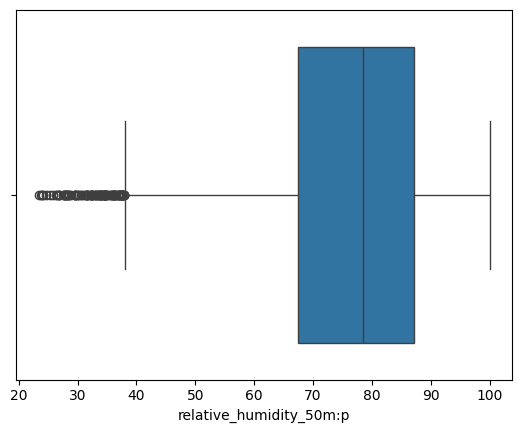

In [21]:
sns.boxplot(data=df, x='relative_humidity_50m:p');

In [15]:
## DONT DO THIS; NOT WORTH IT

# eps = 1e-5
# df['log_relative_humidity_2m:p'] = np.log(df['relative_humidity_2m:p'] + eps)
# df['log_relative_humidity_10m:p'] = np.log(df['relative_humidity_10m:p'] + eps)
# df['log_relative_humidity_50m:p'] = np.log(df['relative_humidity_50m:p'] + eps)
# df['log_relative_humidity_100m:p'] = np.log(df['relative_humidity_100m:p'] + eps)

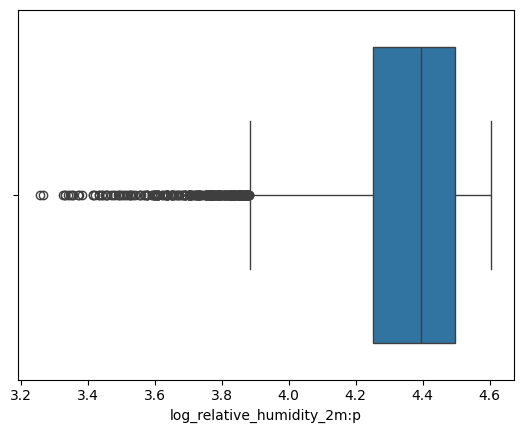

In [23]:
sns.boxplot(data=df, x='log_relative_humidity_2m:p');

In [26]:
round(df[[
    'sunshine_duration_1h:min'
]].describe(),2)

,sunshine_duration_1h:min
count,9515.00
mean,13.36
std,20.56
min,0.00
25%,0.00
50%,0.00
75%,23.30
max,60.00


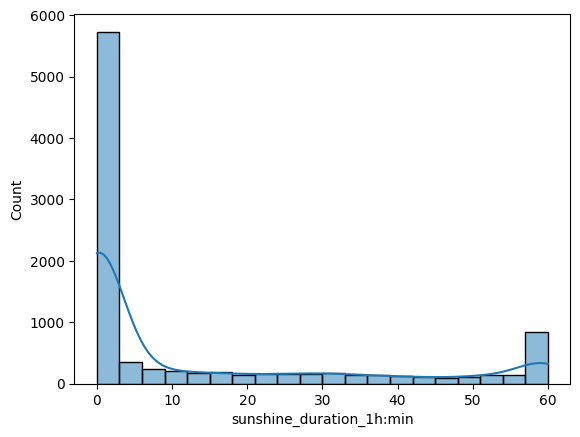

In [27]:
sns.histplot(df["sunshine_duration_1h:min"], bins=20,kde = True);


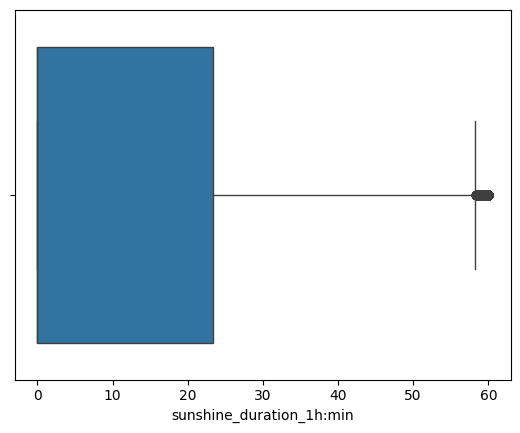

In [28]:
sns.boxplot(data=df, x='sunshine_duration_1h:min');

In [52]:
df['log_sunshine_duration_1h:min'] = np.log(df['sunshine_duration_1h:min'] + eps)

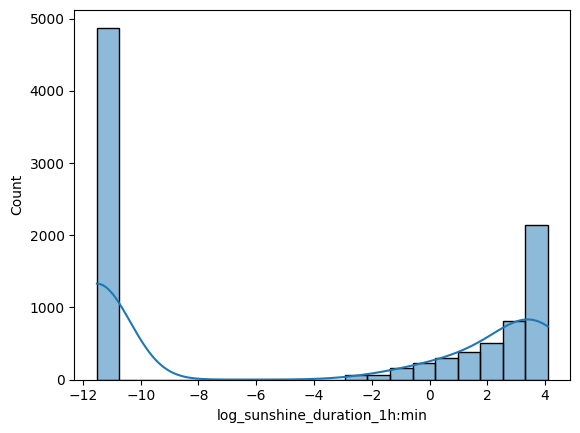

In [54]:
sns.histplot(df["log_sunshine_duration_1h:min"], bins=20,kde = True);


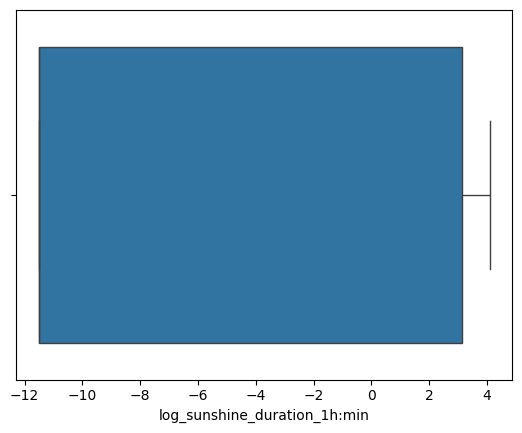

In [53]:
sns.boxplot(data=df, x='log_sunshine_duration_1h:min');

# radiation_1h:Wh

In [29]:
round(df[[
    "diffuse_rad_1h:Wh"
]].describe(),2)

,diffuse_rad_1h:Wh
count,9515.00
mean,38.55
std,59.00
min,0.00
25%,0.00
50%,2.64
75%,63.10
max,314.36


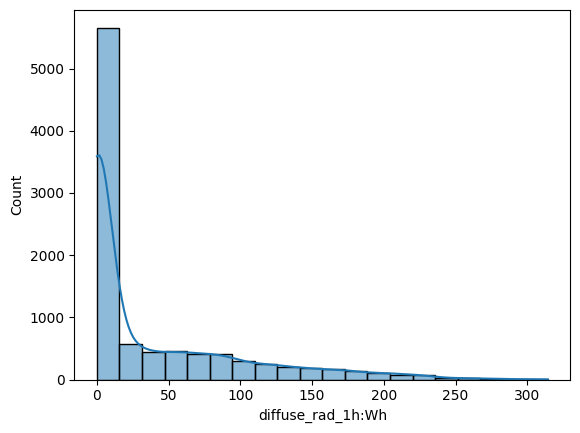

In [31]:
sns.histplot(df["diffuse_rad_1h:Wh"], bins=20,kde = True);

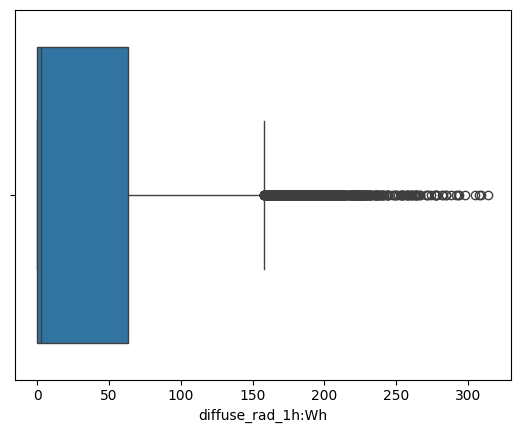

In [32]:
sns.boxplot(data=df, x='diffuse_rad_1h:Wh');

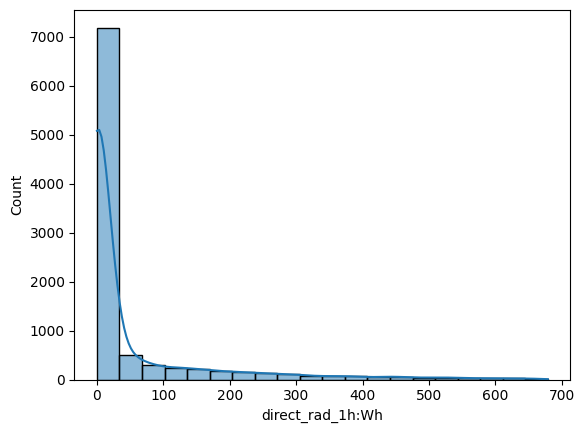

In [34]:
sns.histplot(df["direct_rad_1h:Wh"], bins=20,kde = True);

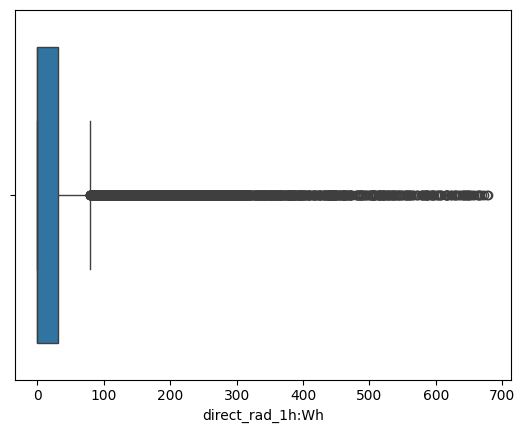

In [33]:
sns.boxplot(data=df, x='direct_rad_1h:Wh');

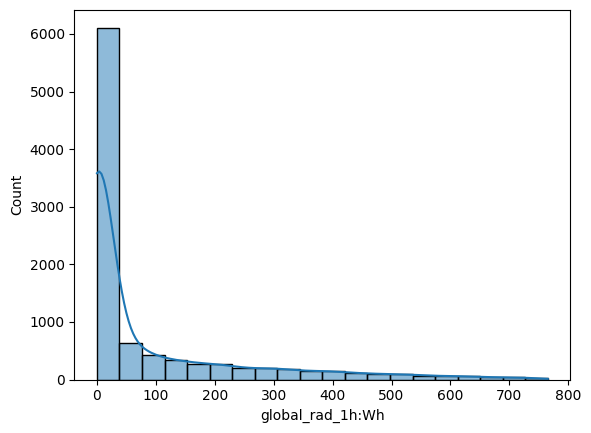

In [35]:
sns.histplot(df["global_rad_1h:Wh"], bins=20,kde = True);

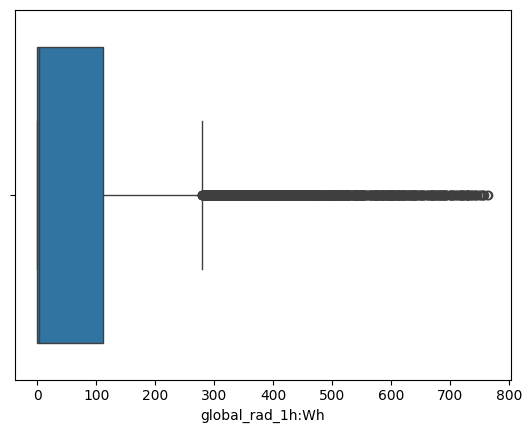

In [36]:
sns.boxplot(data=df, x='global_rad_1h:Wh');

In [37]:
eps = 1e-5
df['log_diffuse_rad_1h:Wh'] = np.log(df['diffuse_rad_1h:Wh'] + eps)
df['log_direct_rad_1h:Wh'] = np.log(df['direct_rad_1h:Wh'] + eps)
df['log_global_rad_1h:Wh'] = np.log(df['global_rad_1h:Wh'] + eps)

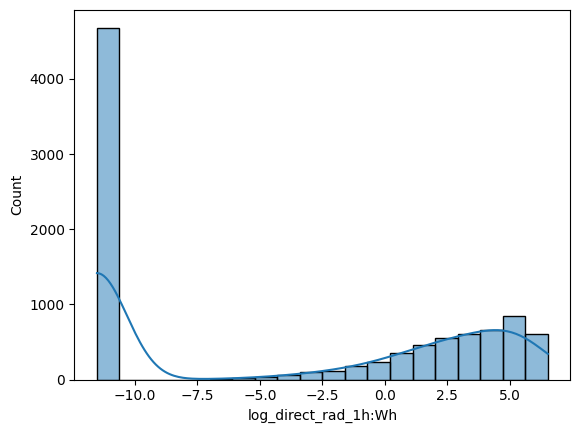

In [42]:
sns.histplot(df["log_direct_rad_1h:Wh"], bins=20,kde = True);

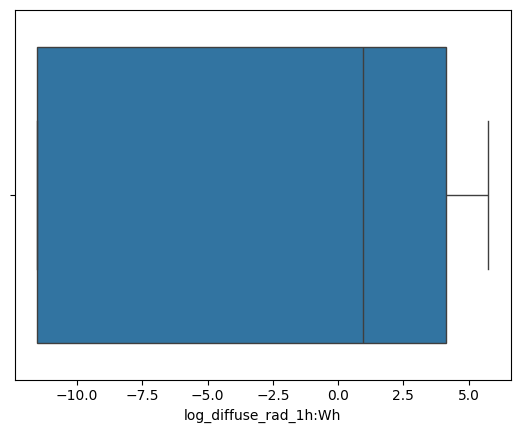

In [46]:
sns.boxplot(data=df, x='log_diffuse_rad_1h:Wh');

In [ ]:
round(df[[
    "'relative_humidity_100m:p',
    'relative_humidity_10m:p',
    'relative_humidity_2m:p',
    'relative_humidity_50m:p'"
]].describe(),2)

sns.histplot(df["relative_humidity_100m:p"], bins=20,kde = True);

sns.boxplot(data=df, x='dew_point_10m:C');

In [68]:
sorted(df.columns)

['clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'consumption',
 'dew_point_100m:C',
 'dew_point_10m:C',
 'dew_point_2m:C',
 'dew_point_50m:C',
 'diffuse_rad:W',
 'diffuse_rad_1h:Wh',
 'direct_rad:W',
 'direct_rad_1h:Wh',
 'effective_cloud_cover:p',
 'global_rad:W',
 'global_rad_1h:Wh',
 'high_cloud_cover:p',
 'low_cloud_cover:p',
 'medium_cloud_cover:p',
 'precip_1h:mm',
 'precip_type:idx',
 'precip_type:idx_0',
 'precip_type:idx_1',
 'precip_type:idx_2',
 'precip_type:idx_3',
 'prob_precip_1h:p',
 'pv_production',
 'relative_humidity_100m:p',
 'relative_humidity_10m:p',
 'relative_humidity_2m:p',
 'relative_humidity_50m:p',
 'spot_market_price',
 'sun_azimuth:d',
 'sun_elevation:d',
 'sunshine_duration_1h:min',
 't_100m:C',
 't_10m:C',
 't_50m:C',
 'temp',
 'time',
 'total_cloud_cover:p',
 'wind_dir_100m:d',
 'wind_dir_10m:d',
 'wind_dir_2m:d',
 'wind_dir_50m:d',
 'wind_production',
 'wind_speed_100m:ms',
 'wind_speed_10m:ms',
 'wind_speed_2m:ms',
 'wind_speed_50m:ms']